In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Workshop 2 AI/Dataset/Copy of bank .csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.job.dtype
bank_object_data = df.select_dtypes(include=['object'])
bank_object_data.head()
for obj in bank_object_data.columns:
    columns = bank_object_data[obj]
    print(f"{obj}: {columns.unique()}")
    print("")

job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital: ['married' 'single' 'divorced']

education: ['tertiary' 'secondary' 'unknown' 'primary']

default: ['no' 'yes']

housing: ['yes' 'no']

loan: ['no' 'yes']

contact: ['unknown' 'cellular' 'telephone']

month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

poutcome: ['unknown' 'failure' 'other' 'success']

y: ['no' 'yes']



In [5]:
bank_numeric_data = df.select_dtypes(exclude=['object'])
bank_numeric_data.to_csv("/content/drive/MyDrive/Workshop 2 AI/Dataset/banknumericdata.csv")

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ai_sem03/datasets/banknumericdata.csv')
df.head()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
0,0,58,2143,5,261,1,-1,0
1,1,44,29,5,151,1,-1,0
2,2,33,2,5,76,1,-1,0
3,3,47,1506,5,92,1,-1,0
4,4,33,1,5,198,1,-1,0


In [ ]:
df.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22605.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,0.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11302.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22605.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33907.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Problem 2 - Data Imputations:

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Workshop 2 AI/Dataset/Copy of medical_students_dataset.csv')
df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [7]:
is_null =  df.isnull().sum()
print(is_null)

Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64


In [8]:
#deleting the null value row of student id because if we cannot identify which student he/she is
#it's no point of have that row of data at all which makes it one of the most important data cols of this dataset
df= df.dropna(subset='Student ID')
df= df.dropna(subset='Gender')
df= df.dropna(subset='Blood Type')


In [ ]:
print(df['Age'].unique())

[18. nan 32. 23. 28. 21. 34. 29. 24. 31. 30. 22. 27. 25. 33. 20. 19. 26.]


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Height'] = df['Height'].fillna(df['Height'].mean())
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())
df['Heart Rate'] = df['Heart Rate'].fillna(df['Heart Rate'].mean())
df['Blood Pressure'] = df['Blood Pressure'].fillna(df['Blood Pressure'].mean())
df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].mean())

In [ ]:
for i in df['Height']:
    df["Height"] = i/100
df['BMI'] = df['BMI'].fillna(df['Weight']/(df['Height']*df['Height']))

In [ ]:
df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.00000,Female,1.539274,72.354947,O,27.645835,98.600838,95.0,109.000000,203.0,No,NaN
1,2.0,26.03171,Male,1.539274,47.630941,B,20.102832,98.714977,93.0,104.000000,163.0,No,No
2,3.0,32.00000,Female,1.539274,55.741083,A,16.729017,98.260293,76.0,130.000000,216.0,Yes,No
4,5.0,23.00000,Female,1.539274,46.234173,O,19.513320,98.480008,95.0,114.590821,231.0,No,No
7,8.0,28.00000,Male,1.539274,52.389752,AB,15.063921,98.227788,85.0,123.000000,128.0,No,No


In [ ]:
print(df['Diabetes'].unique())

['No' 'Yes' nan]


In [ ]:
df['Diabetes'] = df['Diabetes'].fillna('No')
df['Smoking'] = df['Smoking'].fillna('No')

In [ ]:
df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.00000,Female,1.539274,72.354947,O,27.645835,98.600838,95.0,109.000000,203.0,No,No
1,2.0,26.03171,Male,1.539274,47.630941,B,20.102832,98.714977,93.0,104.000000,163.0,No,No
2,3.0,32.00000,Female,1.539274,55.741083,A,16.729017,98.260293,76.0,130.000000,216.0,Yes,No
4,5.0,23.00000,Female,1.539274,46.234173,O,19.513320,98.480008,95.0,114.590821,231.0,No,No
7,8.0,28.00000,Male,1.539274,52.389752,AB,15.063921,98.227788,85.0,123.000000,128.0,No,No


# Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Workshop 2 AI/Dataset/Copy of Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
new_df  = df[['Name','Pclass','Sex','Age','Fare','Survived']]
new_df.head()

,Name,Pclass,Sex,Age,Fare,Survived
0,"Braund, Mr. Owen Harris",3,male,22.0,7.2500,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
2,"Heikkinen, Miss. Laina",3,female,26.0,7.9250,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
4,"Allen, Mr. William Henry",3,male,35.0,8.0500,0


In [ ]:
new_df['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [ ]:
new_df['Age'].isnull().sum()
new_df.dropna(subset='Age')
new_df.head()

,Name,Pclass,Sex,Age,Fare,Survived
0,"Braund, Mr. Owen Harris",3,male,22.0,7.2500,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
2,"Heikkinen, Miss. Laina",3,female,26.0,7.9250,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
4,"Allen, Mr. William Henry",3,male,35.0,8.0500,0


In [ ]:
#The all() function returns True if all items in an iterable are true, otherwise it returns False.
#An iterable is any Python object capable of returning its members one at a time,
# permitting it to be iterated over in a for-loop.
if all(col in df.columns for col  in ['S','C','Q']):
    print("embarked already encoded")
else:
    df_encoded  = pd.get_dummies(df['Embarked'], dtype=int)
    df = pd.concat([df,df_encoded],axis='columns')
if all(em in df.columns for em in ['Embarked']):
    df =df.drop('Embarked',axis='columns')
else:
    print("embarked already dropped")

embarked already encoded
embarked already dropped


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


In [ ]:
survival_rate_male = df[df['Sex']=="male"]['Survived'].mean()
survival_rate_female = df[df['Sex']=='female']['Survived'].mean()

0.7420382165605095

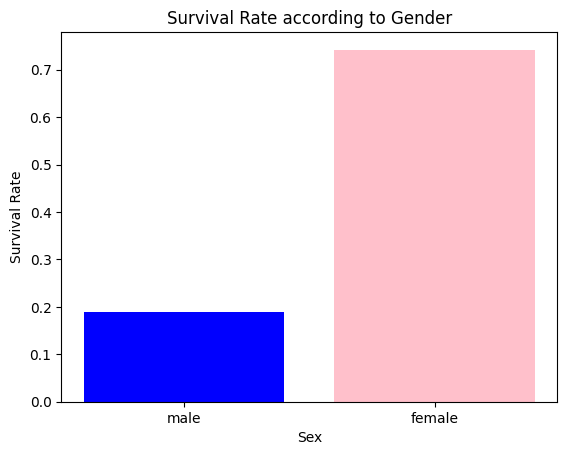

In [ ]:
plt.bar(['male','female'],[survival_rate_male,survival_rate_female],color=['blue','pink'])
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate according to Gender')
plt.show()

In [ ]:
em_S = df['S'].mean()
em_Q= df['Q'].mean()
em_C= df['C'].mean()

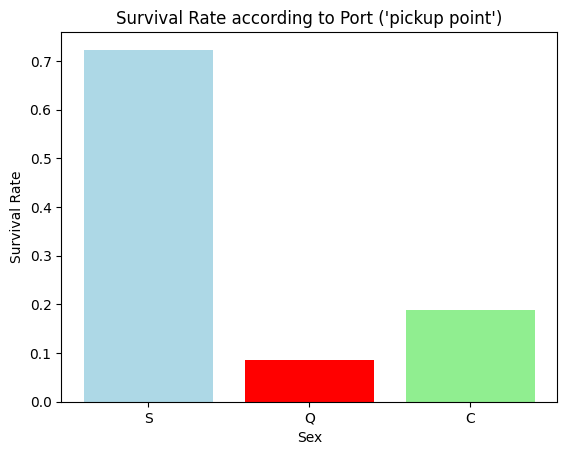

In [ ]:
plt.bar(['S','Q','C'],[em_S,em_Q,em_C],color=['lightblue','red','lightgreen'])
plt.xlabel('Port')
plt.ylabel('Survival Rate')
plt.title('Survival Rate according to Port (\'pickup point\')')
plt.show()

In [ ]:
df['Age'].isnull().sum()
df.dropna(subset='Age')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


In [ ]:
age_group = pd.qcut(df['Age'],q=5,labels=[1,2,3,4,5])
age_group.head()

,Age
0,2
1,4
2,3
3,4
4,4


In [ ]:
age1=df[df['Age']==1]['Survived'].mean()
age2=df[df['Age']==2]['Survived'].mean()
age3=df[df['Age']==3]['Survived'].mean()
age4=df[df['Age']==4]['Survived'].mean()
age5=df[df['Age']==5]['Survived'].mean()

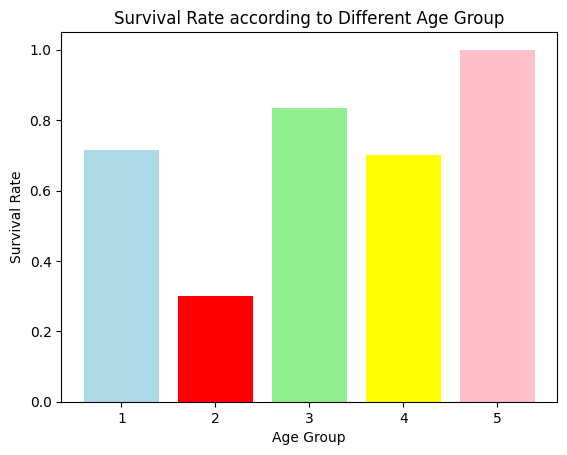

In [ ]:
plt.bar(['1','2','3','4','5'],[age1,age2,age3,age4,age5],color=['lightblue','red','lightgreen','yellow','pink'])
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate according to Different Age Group')
plt.show()